# Линейная регрессия

## Литература

* [Открытый курс машинного обучения. Тема 4. Линейные модели классификации и регрессии](https://habr.com/ru/company/ods/blog/323890/)
* [Wiki - Линейная регрессия](https://ru.wikipedia.org/wiki/%D0%9B%D0%B8%D0%BD%D0%B5%D0%B9%D0%BD%D0%B0%D1%8F_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F)
* [Linear Regression using Gradient Descent](https://towardsdatascience.com/linear-regression-using-gradient-descent-97a6c8700931)

## Теория

**Линейная регрессия** — регрессионная модель зависимости одной (объясняемой, зависимой) переменной $y$ от одной или нескольких других переменных (факторов, регрессоров, независимых переменных) $x$ с линейной функцией зависимости. По сути, линейная модель регрессии представляет из себя взвешенную сумму всех признаков. Линейная регрессия позволяет прогнозировать значения количественного признака в виде линейной комбинации прочих признаков с параметрами - весами модели. Оптимальные (в смысле минимальности некоторого функционала ошибки) параметры линейной регрессии можно найти аналитически с помощью нормального уравнения или численно с помощью методов оптимизации.

### Задача

* Множество объектов-ответов
    * Каждый объект описан множеством объясняющих факторов: $x_j$
    * Каждый объект имеет соответствующую целевую (объясняемую) переменную: $y \in \mathbb{R}$
    * Объясняемая переменная может быть вычислена из объясняющих факторов:

$$\vec y = f(\vec x) = w_0 + \sum_{j = 1}^{m} w_j x_j$$

где 
* $w_0$ - свободный коэффициент (intercept)
* $w_j$ - веса признаков

Если добавить фиктивную размерность $x_0 = 1$ для каждого объекта, тогда можно будет поместить $w_0$ под знак суммы:

$$\vec y = \sum_{j = 0}^{m} w_j x_j = \vec{w}^T \vec{x}_i = \langle w, x \rangle$$

Мы можем рассматривать полученный результат как матрицу объектов-признаков, если добавим к ней единичную колонку:

$$\vec y = X \vec w + \epsilon$$

или для одного объекта:

$$y_i = \sum_{j = 0}^{m} X_{i,j} w_j + \epsilon_i$$

Где:
* $\vec y \in \mathbb{R}^n$ – объясняемая (целевая) переменная;
* $w$ – вектор параметров модели (веса);
* $X$ – матрица наблюдений и признаков размерности $n$ строк на $m + 1$ столбцов (с фиктивной единичной колонкой),  $\text{rank}\left(X\right) = m + 1$;
* $\epsilon$ – случайная переменная, соответствующая случайной, непрогнозируемой ошибке модели.

Также на модель накладываются следующие **ограничения** (иначе это будет какая то другая регрессия, но точно не линейная):
* мат ожидание случайных ошибок равно нулю: $\forall i: \mathbb{E}\left[\epsilon_i\right] = 0$;
* дисперсия случайных ошибок одинакова и конечна (свойство гомоскедастичности): $\forall i: \text{Var}\left(\epsilon_i\right) = \sigma^2 < \infty$;
* случайные ошибки не скоррелированы: $\forall i \neq j: \text{Cov}\left(\epsilon_i, \epsilon_j\right) = 0$.

Оценка $\hat{w}_i$ весов $w_i$ называется линейной, если $\hat{w}_i = \omega_{1i}y_1 + \omega_{2i}y_2 + \cdots + \omega_{ni}y_n,$ где $\forall\ k\ \omega_{ki}$ зависит только от наблюдаемых данных $X$ и почти наверняка нелинейно. Так как решением задачи поиска оптимальных весов будет именно **линейная оценка**, то и модель называется линейной регрессией. 

Оценка $\hat{w}_i$ называется несмещенной тогда, когда матожидание оценки равно реальному, но неизвестному значению оцениваемого параметра: $\mathbb{E}\left[\hat{w}_i\right] = w_i$

### Аналитическое решение

Для вычисления параметров модели вводится функционал ошибки - среднеквадратическая ошибка:

$$\mathcal{L}\left(X, \vec{y}, \vec{w} \right) = \frac{1}{2n} \sum_{i=1}^n (\langle w, x_i \rangle - y_i)^2$$

Минимизируем среднеквадратичную ошибку между реальным значением зависимой переменной и прогнозом, выданным моделью, при помощи **метода наименьших квадратов (МНК)**:

$$\mathcal{L}\left(X, \vec{y}, \vec{w} \right) \rightarrow \min\limits_{w}$$

Таким образом:

$$\begin{array}{rcl}\mathcal{L}\left(X, \vec{y}, \vec{w} \right) &=& \frac{1}{2n} \sum_{i=1}^n \left(y_i - \vec{w}^T \vec{x}_i\right)^2 \\ &=& \frac{1}{2n} \left\| \vec{y} - X \vec{w} \right\|_2^2 \\ &=& \frac{1}{2n} \left(\vec{y} - X \vec{w}\right)^T \left(\vec{y} - X \vec{w}\right) \end{array}$$

Для решения данной оптимизационной задачи необходимо вычислить производную $\frac{\partial \mathcal{L}}{\partial \vec{w}}$ по параметрам модели, приравнять ее к нулю и решить полученное уравнение относительно $\vec w$:

$$\begin{array}{rcl} \frac{\partial \mathcal{L}}{\partial \vec{w}} &=& \frac{\partial}{\partial \vec{w}} \frac{1}{2n} \left( \vec{y}^T \vec{y} -2\vec{y}^T X \vec{w} + \vec{w}^T X^T X \vec{w}\right) \\ &=& \frac{1}{2n} \left(-2 X^T \vec{y} + 2X^T X \vec{w}\right) \end{array}$$

$$\begin{array}{rcl} \frac{\partial \mathcal{L}}{\partial \vec{w}} = 0 &\Leftrightarrow& \frac{1}{2n} \left(-2 X^T \vec{y} + 2X^T X \vec{w}\right) = 0 \\ &\Leftrightarrow& -X^T \vec{y} + X^T X \vec{w} = 0 \\ &\Leftrightarrow& X^T X \vec{w} = X^T \vec{y} \\ &\Leftrightarrow& \vec{w} = \left(X^T X\right)^{-1} X^T \vec{y} \end{array}$$

Теперь, опираясь на теорему Маркова-Гаусса, мы можем утверждать, что оценка МНК является лучшей оценкой параметров модели, среди всех линейных и несмещенных оценок, то есть обладающей наименьшей дисперсией:

$$\hat{\vec{w}} = (X^T X)^{-1} X^T \vec y$$

Но почему мы минимизируем среднеквадратичную ошибку, а не что-то другое? Ведь можно минимизировать среднее абсолютное значение невязки или еще что-то. Единственное, что произойдёт в случае изменения минимизируемого значения, так это то, что мы выйдем из условий теоремы Маркова-Гаусса, и наши оценки перестанут быть лучшими среди линейных и несмещенных.

Это все из-за того, что минимизация среднеквадратичной ошибки – это то же самое, что и максимизация правдоподобия данных. Мы хотим найти гипотезу максимального правдоподобия, т.е. нам нужно максимизировать выражение $p\left(\vec{y} \mid X, \vec{w}\right)$:

$$\begin{array}{rcl} \hat{\vec{w}} &=& \arg \max_{w} p\left(\vec{y} \mid X, \vec{w}\right) \\ &=& \arg \max_{w} -\frac{n}{2}\log 2\pi\sigma^2 -\frac{1}{2\sigma^2} \sum_{i=1}^n \left(y_i - \vec{w}^T \vec{x}_i\right)^2 \\ &=& \arg \max_{w} -\frac{1}{2\sigma^2} \sum_{i=1}^n \left(y_i - \vec{w}^T \vec{x}_i\right)^2 \\ &=& \arg \max_{w} -\mathcal{L}\left(X, \vec{y}, \vec{w} \right) \end{array}$$

Именно MSE является следствием того, что ошибка распределена нормально, а не как-то по-другому. Кроме того, зная этот факт, мы можем использовать в задачах свойства метода максимального правдоподобия, например, используя асимптотическую нормлаьность, можно определять значимость признаков в модели и делать их отбор. Также можно строить доверительные интервалы для значения отклика на новых объектах, которых нет в обучающей выборке.

### Численное решение

Основную сложность при нахождении решения аналитическим способом представляет вычисление обратной матрицы - это достаточно вычислительно сложная задача. Поэтому на практике применяются численные методы оптимизации.

Свойства MSE-функции:
* Функция является гладкой (существует градиент в каждой точке)
* Функция является выпуклой (существует лишь один минимум)

Благодаря этим свойствам для нахождения численного решения мы можем использовать **алгоритм градиентного спуска**:

1. Задать начальное приближение вектору весов $w^{(0)}$.
2. Повторяем до наступления сходимости (например, $||w^{(t)} - w^{(t-1)}|| < \epsilon$):

    На каждой следующей следующей итерации ($t = 1, 2, 3, ...$) из приближения, полученного на предыдущей итерации $w^{t-1}$, вычитается вектор градиента в соответствующей точке $w^{t-1}$, умноженный на коэффициент скорости обучения $\eta_t$ (learning rate):
$$w^{(t)} = w^{(t-1)} - \eta_t \nabla \mathcal{L}\left(X, \vec{y}, w^{(t-1)} \right) = \frac{\eta_t}{n} \sum_{i=1}^n \nabla \mathcal{L}_i\left(x_i, y_i, w^{(t-1)} \right) = \frac{\eta_t}{n} \sum_{i=1}^n x_i^j (\langle w, x_i \rangle - y_i)$$

### [Реализация парной линейной регрессии](https://towardsdatascience.com/linear-regression-using-gradient-descent-97a6c8700931)

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

Пусть $\vec y = m X + c$. Параметры модели - веса $m, c$. В выборке имеется $n$ объектов.

Среднеквадратическая ошибка для модели: 

$$\mathcal{L}\left(X, \vec{y}, m, c \right) = \frac{1}{2n} \sum_{i=1}^n (m x_i + c - y_i)^2 \rightarrow \min\limits_{m, c}$$

Формула вычисления частных производных по весам $m, c$:

$$\frac{\partial \mathcal{L}}{\partial m} = \frac{1}{n} \sum_{i=1}^n (m x_i + c - y_i)x_i$$ 
$$\frac{\partial \mathcal{L}}{\partial c} = \frac{1}{n} \sum_{i=1}^n (m x_i + c - y_i)$$

In [2]:
# Генерация случайного набора данных
np.random.seed(0)
n = 100
X = np.random.rand(n, 1)
y = 2 + 5 * X + np.random.rand(n, 1)

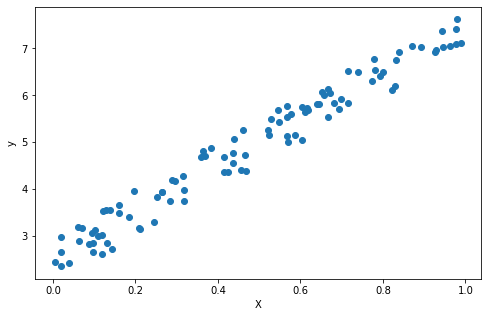

In [3]:
# Отобразим данные
plt.rcParams['figure.figsize'] = (8, 5)
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [4]:
learning_rate = 0.005
number_of_epochs = 10000
m, c = 0, 0

for i in range(number_of_epochs): 
    y_pred = m * X + c
    D_m = (-1 / n) * sum(X * (y - y_pred))
    D_c = (-1 / n) * sum(y - y_pred)
    m = m - learning_rate * D_m
    c = c - learning_rate * D_c

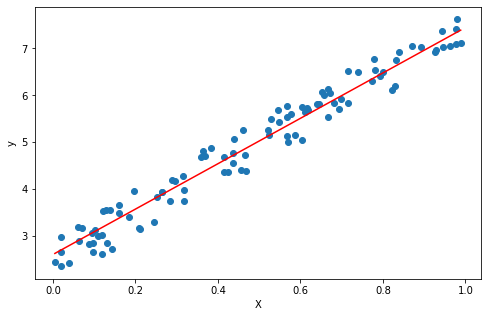

In [5]:
# Предсказания модели
y_pred = m * X + c

plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')
plt.plot([min(X), max(X)], [min(y_pred), max(y_pred)], color='red')
plt.show()

[Визуализация метода](https://miro.medium.com/max/1400/1*CjTBNFUEI_IokEOXJ00zKw.gif)

### Градиентный спуск для задачи поиска оптимальных коэффициентов в MSE регрессии

Модель линейной регрессии: 

$$a(x) = \beta_1 d_{1} + \beta_2 d_{2} + ... + \beta_{n} d_{n} + \beta_0$$

Минимизируемая функция MSE:

$$Q(a(X), Y) = \sum_{i=1}^{N} (a(x_i) - y_i)^2 = \frac{1}{N}\cdot\sum_{i=1}^N (\beta_1 \cdot d_{i1} + ... + \beta_n \cdot d_{in} - y_i)^2$$

Вектор-градиент по всем переменным:

$$ \nabla Q(a, X) = (Q'_{\beta_1} \;\;\; Q'_{\beta_2} \;\;\; ...  \;\;\;  Q'_{\beta_n}) $$

Вычисление производной по одной из переменных:

$$ Q'_{\beta_1} = \frac{2}{N} \cdot \sum_{i=1}^N d_{i1} (\beta_1 \cdot d_{i1} + ... + \beta_{n} \cdot d_{in} - y_i) $$

Каждая итерация градиентного спуска при установленном learning_rate ($\eta$): 

$$\beta^{(n+1)} = \beta^{(n)} - \eta \cdot \nabla Q(\beta^{(n)})$$

Обучение происходит до схождения, то есть:

$$|Q(\beta^{(n)}) - Q(\beta^{(n+1)})| < threshold$$

In [6]:
data = pd.read_csv('tmp/data.csv')
X = data.drop(columns=['target'], axis=1)
Y = data['target']

In [7]:
class LinearRegressionGradientDescentMse:
    """ Базовый класс для реализации градиентного спуска в задаче линейной МНК регрессии """

    def __init__(self,
                 df_features: pd.DataFrame,
                 df_target: pd.DataFrame,
                 learning_rate: float=1e-3,
                 threshold=1e-6,
                 copy: bool=True):
        """
        self.X - матрица признаков
        self.y - вектор таргетов
        self.beta - вектор весов модели
        self.learning_rate - шаг обучения для корректировки нормы градиента
        self.threshold - порог для остановки градиентного спуска
        iteration_loss_dict - словарь, хранящий номер итерации и значение MSE на ней
        copy: копирование матрицы признаков или создание изменения in-place
        """
        self.X = df_features.copy().values if copy else df_features.values
        self.y = df_target.values
        
        # Добавление константной колонки (interсept) в матрицу признаков
        interсept = np.ones(self.X.shape[0])
        self.X = np.c_[self.X, interсept]
        
        # Инициализируем веса модели единицами
        self.beta = np.ones(self.X.shape[1])
        
        self.learning_rate = learning_rate
        self.threshold = threshold
        self.iteration_loss_dict = dict()     
        
    def calculate_mse_loss(self) -> float:
        """
        Метод для расчета MSE
        :return: среднеквадратическая ошибка при текущих весах модели
        """
        return np.mean((np.dot(self.X, self.beta) - self.y) ** 2)
        
    def calculate_gradient(self) -> np.ndarray:
        """
        Метод для вычисления вектора-градиента
        :return: вектор-градиент, содержащий производные по каждому признаку
        """
        gradient = np.empty(self.X.shape[1])

        for j in range(self.X.shape[1]):
            gradient[j] = 2 * np.mean((np.dot(self.X, self.beta) - self.y) * self.X[:, j])

        return gradient
    
    def iteration(self):
        """ Метод для обновления весов в соответствии с текущим вектором-градиентом """
        self.beta = self.beta - (self.learning_rate * self.calculate_gradient())
        
    def fit(self):
        """ Метод для обучения весов модели до срабатывания критерия останова """
        iteration = 0
        self.iteration()
        self.iteration_loss_dict[iteration] = self.calculate_mse_loss()

        while True:
            iteration += 1
            self.iteration()
            self.iteration_loss_dict[iteration] = self.calculate_mse_loss()
            abs_delta = abs(self.iteration_loss_dict[iteration] - self.iteration_loss_dict[iteration - 1])
            if abs_delta < self.threshold:
                break

In [8]:
GD = LinearRegressionGradientDescentMse(df_features=X, df_target=Y)
GD.fit()

In [9]:
# Веса модели при переменных d1, ..., d10, d0
GD.beta

array([0.88733305, 1.90100713, 2.88063607, 3.87662612, 4.89623507,
       5.89126182, 6.89254811, 7.90311947, 8.87580109, 9.86109585,
       4.94854733])

In [10]:
# Веса модели логистической регрессии из пакета sklearn
lr = LinearRegression()
lr.fit(X, Y);
lr.coef_, lr.intercept_

(array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]), 4.373157038707117)